<a href="https://colab.research.google.com/github/BaberFaisal/LInear_model_-on_usa-real-estate-dataset/blob/main/Copy_of_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [ ]:
df = pd.read_csv("/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv")
print("df shape:", df.shape)
df.head()

df shape: (2226382, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
mask_ba = df["city"].str.contains("Aguada")
mask_price = df["price"] < 900_000

df  = df[mask_ba & mask_price]


In [ ]:
df.describe()["acre_lot"]

count    39.000000
mean      2.355128
std       6.368477
min       0.070000
25%       0.210000
50%       0.280000
75%       0.780000
max      33.350000
Name: acre_lot, dtype: float64

## Explore

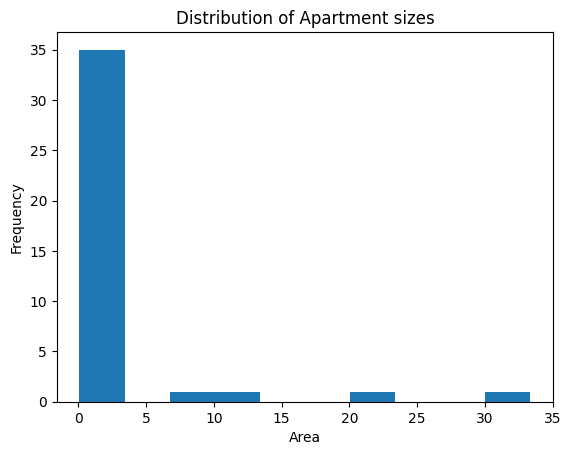

In [ ]:
plt.hist(df["acre_lot"]);  # Adjust bins as needed
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.title("Distribution of Apartment sizes")
plt.show()

In [ ]:
low, high = df["acre_lot"].quantile([0.1, 0.9])
mask_area = df["acre_lot"].between(low, high)
df = df[mask_area]

### To removes observations that are outliers in the "house_size" column. Specifically, all observations should fall between the 0.1 and 0.9 quantiles for "house_size"

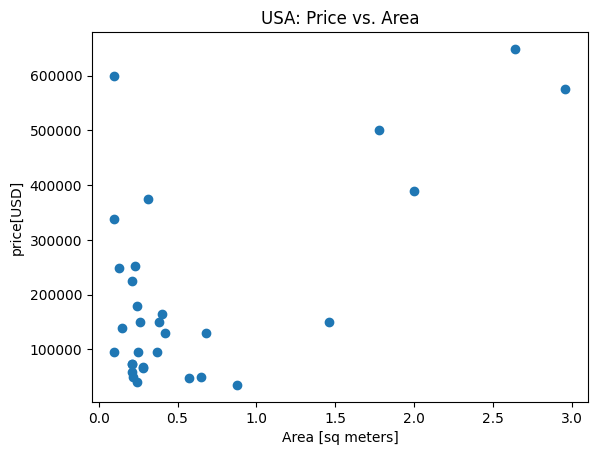

In [ ]:
upper_limit = 0.6  # Set an appropriate upper limit based on your dataset
filtered_df = df[df["acre_lot"] < upper_limit]
plt.scatter(x= df["acre_lot"], y=df["price"])
plt.xlabel("Area [sq meters]")
plt.ylabel("price[USD]")
plt.title("USA: Price vs. Area");

## Split

In [ ]:
features = ["acre_lot"]
X_train = df[features]
X_train.shape

(31, 1)

In [ ]:
target = "price"
y_train = df[target]
y_train.shape

(31,)

# Build Model

In [ ]:
y_mean =y_train.mean()
y_train

44      95000.0
46     139500.0
47     149900.0
48     180000.0
49     249000.0
50     252000.0
53     500000.0
54     339000.0
57     389000.0
58     575000.0
59      35000.0
60      58000.0
62      47000.0
64     375000.0
65      50000.0
67      39500.0
70     600000.0
71     649000.0
73     150000.0
74      74000.0
75      65500.0
76      67500.0
77      74000.0
78     130000.0
79      95000.0
81     130000.0
82      94770.0
83     150000.0
84     165000.0
98     225000.0
569     49000.0
Name: price, dtype: float64

In [ ]:
y_pred_baseline = [y_mean]*len(y_train)
len(y_pred_baseline) == len(y_train)

True

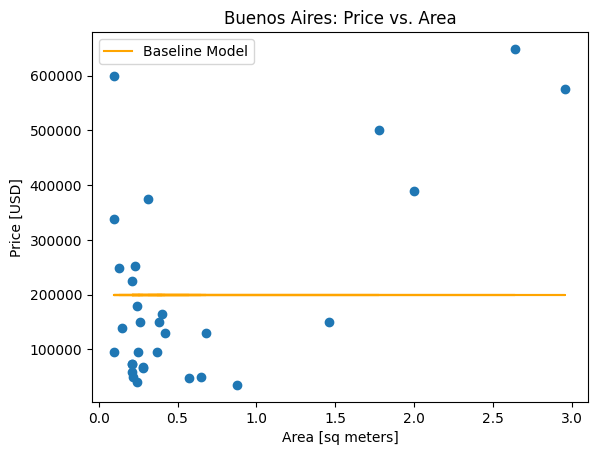

In [ ]:
plt.plot(X_train.values, y_pred_baseline, color="orange", label= "Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

In [ ]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))


Mean price 199731.29
Baseline MAE: 139076.59


## Iterate

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

## Evaluate

In [ ]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([124394.54784096, 131775.83424087, 148014.66432066, 145062.1497607 ,
       128823.31968091])

In [ ]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 101480.38


# Communicate Results

In [ ]:
intercept = round(model.intercept_,2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 109631.98


In [ ]:
coefficient = round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 147625.73


In [ ]:
print(f"apt_price = {intercept} + {coefficient}*surface_covered")

apt_price = 109631.98 + 147625.73*surface_covered


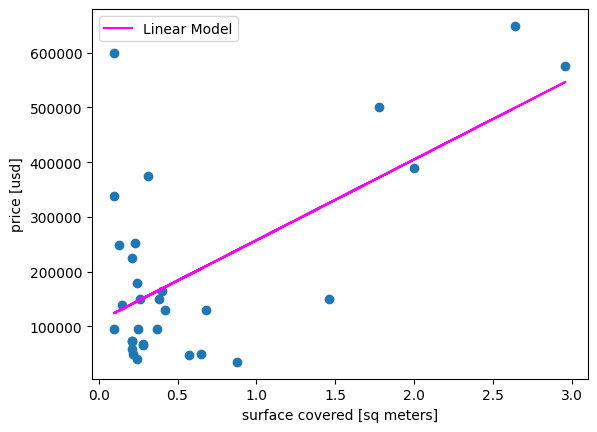

In [ ]:
plt.plot(X_train.values,model.predict(X_train),color="magenta", label = "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();